<center>
    <h1>Mohamed Nasser Aboelnasr</h1>
</center>

In [1]:
import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
from PIL import Image
import os

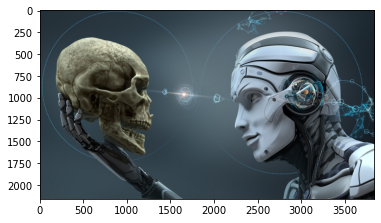

In [2]:
# Original photo
img = Image.open('test.jpg')
plt.imshow(img, cmap='gray')
plt.show()

The size of the original photo : 2296.9248046875 KB


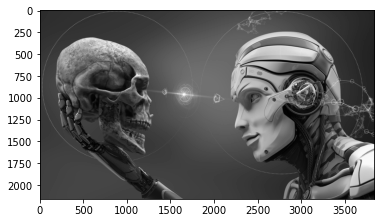

In [3]:
# Grayscale photo
img = Image.open('test.jpg').convert('L')
plt.imshow(img, cmap='gray')
origin_size=os.path.getsize('test.jpg')/1024
print(f"The size of the original photo : {origin_size} KB")
plt.show()

In [4]:
# Transform image to matrix 
img_mat = np.array(list(img.getdata(band=0)), float).reshape(img.size[1],img.size[0])
rank = matrix_rank(img_mat)
print(f"Image Matrix = \n {img_mat}")
print(f"Matrix Rank = {rank}")

Image Matrix = 
 [[45. 45. 45. ... 37. 37. 37.]
 [45. 45. 45. ... 37. 37. 37.]
 [45. 45. 45. ... 37. 37. 37.]
 ...
 [65. 65. 65. ... 26. 26. 26.]
 [65. 65. 65. ... 27. 27. 27.]
 [65. 65. 65. ... 27. 27. 27.]]
Matrix Rank = 2160


In [5]:
MSE_list = []
Compression_ratio = []
# Using SVD
U, sigma, V = svd(img_mat)
print(len(sigma))

2160


# k = 1

The size of the first one rank photo : 933.234375 KB


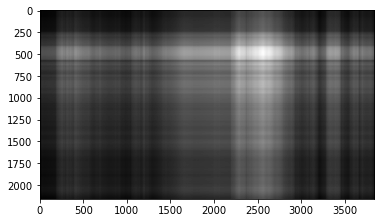

In [6]:
k=1
regenerate_img = U[:, :k] * np.diag(sigma[:k]) * V[:k, :]
imgcom = Image.fromarray((regenerate_img).astype(np.uint8)) # Here we transform the data matrix into photo
imgcom.save('compressedImage.png') # Here we save it in the hard disk
comp_size=os.path.getsize('compressedImage.png')/1024
print(f"The size of the first one rank photo : {comp_size} KB")
plt.imshow(regenerate_img, cmap='gray')
plt.show()
# This is the best one rank image because it has the highest singular value 
# but of course the quality is so bad 
# we need to add some other one rank images to it

In [7]:
# Mean Squared Error
MSE = np.square(np.subtract(regenerate_img,img_mat)).mean()
MSE_list.append(MSE)
print(f"Mean Squared Error = {MSE}")

Mean Squared Error = 1760.9424019264873


In [8]:
# Compression ratio
c_ratio = origin_size / comp_size
Compression_ratio.append(c_ratio)
print(f"The compression ratio is original photo size / compressed photo size : {c_ratio} ")

The compression ratio is original photo size / compressed photo size : 2.46125182078457 


# k = 10

The size of summation of the first 10 rank photos : 1599.4853515625 KB


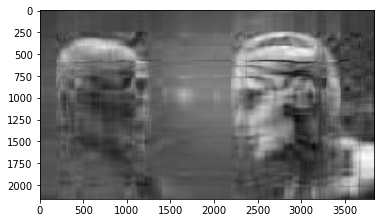

In [9]:
k=10
regenerate_img = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
imgcom = Image.fromarray((regenerate_img).astype(np.uint8)) # Here we transform the data matrix into photo
imgcom.save('compressedImage.png') # Here we save it in the hard disk
comp_size=os.path.getsize('compressedImage.png')/1024
print(f"The size of summation of the first 10 rank photos : {comp_size} KB")
plt.imshow(regenerate_img, cmap='gray')
plt.show()
# This image is the result of summing the first 10 one rank images
# we need to add some other one rank images to it

In [10]:
# Mean Squared Error
MSE = np.square(np.subtract(regenerate_img,img_mat)).mean()
MSE_list.append(MSE)
print(f"Mean Squared Error = {MSE}")

Mean Squared Error = 525.4501508804289


In [11]:
# Compression ratio
c_ratio = origin_size / comp_size
Compression_ratio.append(c_ratio)
print(f"The compression ratio is original photo size / compressed photo size : {c_ratio} ")

The compression ratio is original photo size / compressed photo size : 1.4360399127404873 


# k = 30

The size of summation of the first 30 rank photos : 2082.2392578125 KB


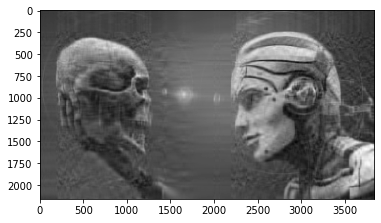

In [12]:
k=30
regenerate_img = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
imgcom = Image.fromarray((regenerate_img).astype(np.uint8)) # Here we transform the data matrix into photo
imgcom.save('compressedImage.png') # Here we save it in the hard disk
comp_size=os.path.getsize('compressedImage.png')/1024
print(f"The size of summation of the first 30 rank photos : {comp_size} KB")
plt.imshow(regenerate_img, cmap='gray')
plt.show()
# This image is the result of summing the first 30 one rank images
# Now the accuracy is good and we can see the image

In [13]:
# Mean Squared Error
MSE = np.square(np.subtract(regenerate_img,img_mat)).mean()
MSE_list.append(MSE)
print(f"Mean Squared Error = {MSE}")

Mean Squared Error = 269.03777870260353


In [14]:
# Compression ratio
c_ratio = origin_size / comp_size
Compression_ratio.append(c_ratio)
print(f"The compression ratio is original photo size / compressed photo size : {c_ratio} ")

The compression ratio is original photo size / compressed photo size : 1.103103207793968 


# k = 100

The size of summation of the first 100 rank photos : 2793.048828125 KB


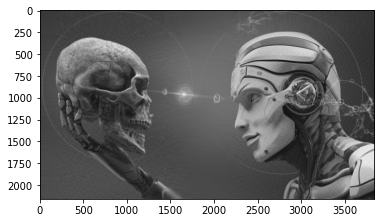

In [15]:
k=100
regenerate_img = np.matrix(U[:, :k]) * np.diag(sigma[:k]) * np.matrix(V[:k, :])
imgcom = Image.fromarray((regenerate_img).astype(np.uint8)) # Here we transform the data matrix into photo
imgcom.save('compressedImage.png') # Here we save it in the hard disk
comp_size=os.path.getsize('compressedImage.png')/1024
print(f"The size of summation of the first 100 rank photos : {comp_size} KB")
plt.imshow(regenerate_img, cmap='gray')
plt.show()
# This image is the result of summing the first 100 one rank images
# Now the image is the same as original but with bigger size

In [16]:
# Mean Squared Error
MSE = np.square(np.subtract(regenerate_img,img_mat)).mean()
MSE_list.append(MSE)
print(f"Mean Squared Error = {MSE}")

Mean Squared Error = 111.05992759529238


In [17]:
# Compression ratio
c_ratio = origin_size / comp_size
Compression_ratio.append(c_ratio)
print(f"The compression ratio is original photo size / compressed photo size : {c_ratio} ")

The compression ratio is original photo size / compressed photo size : 0.8223718760511062 


# The relation between the compression ratios and the MSE for different values of k

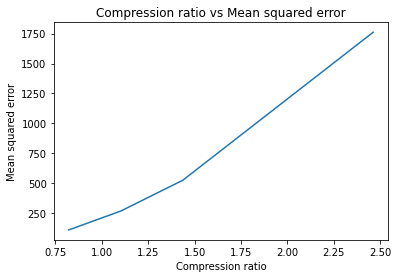

In [18]:
plt.plot(Compression_ratio, MSE_list)
plt.title('Compression ratio vs Mean squared error')
plt.xlabel('Compression ratio')
plt.ylabel('Mean squared error')
plt.show()

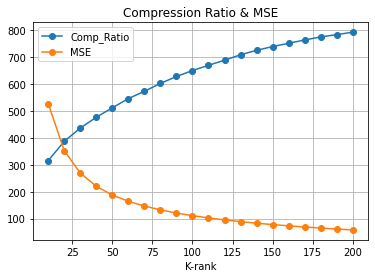

In [19]:
# plot Compression Ratios and MSEs for different k values

k_ranks = []
comp_ratios = []
mean_sq_errors = []

for i in range(10, 201, 10):
    k_ranks.append(i)
    comp_img = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i,:])
    result = Image.fromarray((comp_img ).astype(np.uint8))
    result.save('comp_img.jpg')
    new_size = round(float(os.path.getsize('comp_img.jpg'))/1000,2)
    comp_ratios.append(new_size)
    mse = np.mean(np.square(np.subtract(img_mat,comp_img)))
    mean_sq_errors.append(mse)

# when k increases, compression ratio increases
# and mean square error decreases
plt.plot(k_ranks, comp_ratios, '-o', label="Comp_Ratio")
plt.plot(k_ranks, mean_sq_errors, '-o', label="MSE")
plt.legend()
plt.grid()
plt.xlabel("K-rank")
plt.title("Compression Ratio & MSE")
plt.show()